Data shape: (1797, 64)
Labels shape: (1797,)
Accuracy: 0.9777777777777777

Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  0  1]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  1  0  0  1  0 37]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.94      0.96        34
           4       0.98      0.98      0.98        46
           5       0.96      1.00      0.98        47
           6       1.00      1.00      1.00        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           

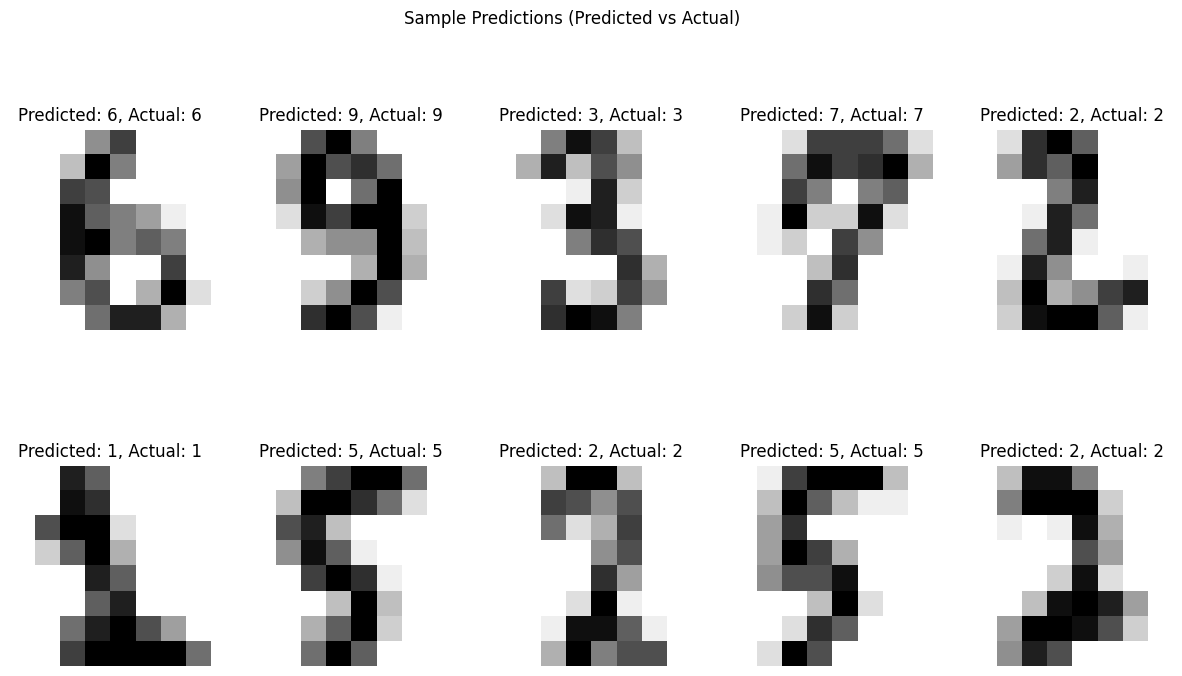

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

# Load the digits dataset
digits = datasets.load_digits()
X = digits.data
y = digits.target

# Display the shape of the dataset
print("Data shape:", X.shape)
print("Labels shape:", y.shape)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM classifier with a linear kernel
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate and print the accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate and display the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(confusion_matrix)

# Print the classification report
classification_report = metrics.classification_report(y_test, y_pred)
print("\nClassification Report:")
print(classification_report)

# Visualize some predictions
plt.figure(figsize=(15, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(8, 8), cmap=plt.cm.gray_r)
    plt.title(f"Predicted: {y_pred[i]}, Actual: {y_test[i]}")
    plt.axis('off')

plt.suptitle("Sample Predictions (Predicted vs Actual)")
plt.show()


Let's go through the code line by line, explaining each part and the concepts involved.

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
```

- **Libraries Import**:
  - `numpy`: A library for numerical computing, here it provides support for handling arrays (though not explicitly used in this code).
  - `matplotlib.pyplot`: A library for creating visualizations, used here to display sample predictions.
  - `sklearn.datasets`: Provides access to machine learning datasets; we use it to load the `digits` dataset.
  - `sklearn.model_selection.train_test_split`: Splits data into training and testing sets to evaluate model performance on unseen data.
  - `sklearn.svm`: Contains implementations of Support Vector Machines (SVMs), which are supervised learning algorithms used for classification tasks.
  - `sklearn.metrics`: Provides tools to evaluate model performance (e.g., accuracy, confusion matrix, classification report).

```python
# Load the digits dataset
digits = datasets.load_digits()
X = digits.data
y = digits.target
```

- **Dataset Loading**:
  - `datasets.load_digits()` loads the `digits` dataset, which contains 8x8 grayscale images of handwritten digits.
  - `X = digits.data`: Assigns the features (pixel values of each 8x8 image) to `X`. Here, each image is flattened into a 64-dimensional vector.
  - `y = digits.target`: Contains the target labels (the digit each image represents, ranging from 0 to 9).

```python
# Display the shape of the dataset
print("Data shape:", X.shape)
print("Labels shape:", y.shape)
```

- **Display Dataset Dimensions**:
  - Prints the dimensions of `X` and `y` to check the dataset size.
  - `X.shape` should print something like `(1797, 64)`, meaning 1,797 images with 64 features each (8x8 pixels).
  - `y.shape` should print `(1797,)`, meaning there is one label for each image.

```python
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

- **Data Splitting**:
  - Splits `X` and `y` into training and test sets using `train_test_split`.
  - `test_size=0.2` specifies that 20% of the data will be used for testing, and the remaining 80% for training.
  - `random_state=42` ensures reproducibility by setting a random seed.

```python
# Initialize and train the SVM classifier with a linear kernel
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
```

- **Model Initialization and Training**:
  - `svm.SVC(kernel='linear')` creates a Support Vector Classifier (SVC) with a linear kernel. A linear kernel is suitable for linearly separable data, which this simple dataset approximates well.
  - `clf.fit(X_train, y_train)` trains the model on the training data `(X_train, y_train)`. During training, the SVM tries to find an optimal hyperplane that best separates the digit classes in feature space.

```python
# Make predictions on the test set
y_pred = clf.predict(X_test)
```

- **Prediction**:
  - `clf.predict(X_test)`: Uses the trained model to predict the digit labels for the test set `X_test`, storing the results in `y_pred`.

```python
# Calculate and print the accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
```

- **Accuracy Calculation**:
  - `metrics.accuracy_score(y_test, y_pred)`: Compares the predicted labels (`y_pred`) to the actual labels (`y_test`) and calculates the accuracy (percentage of correct predictions).
  - `print("Accuracy:", accuracy)`: Displays the accuracy score, which gives a quick summary of model performance.

```python
# Generate and display the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(confusion_matrix)
```

- **Confusion Matrix**:
  - `metrics.confusion_matrix(y_test, y_pred)`: Produces a matrix that shows the number of correct and incorrect predictions for each class. The diagonal elements indicate correct predictions, while off-diagonal elements indicate misclassifications.
  - This matrix helps identify specific classes the model struggles with.

```python
# Print the classification report
classification_report = metrics.classification_report(y_test, y_pred)
print("\nClassification Report:")
print(classification_report)
```

- **Classification Report**:
  - `metrics.classification_report(y_test, y_pred)`: Generates a detailed report with precision, recall, and F1-score for each class:
    - **Precision**: The ratio of true positives to all predicted positives for each class.
    - **Recall**: The ratio of true positives to all actual positives for each class.
    - **F1-score**: The harmonic mean of precision and recall, indicating the balance between the two.
  - This report provides insight into how well the model handles each digit class individually.

```python
# Visualize some predictions
plt.figure(figsize=(15, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(8, 8), cmap=plt.cm.gray_r)
    plt.title(f"Predicted: {y_pred[i]}, Actual: {y_test[i]}")
    plt.axis('off')

plt.suptitle("Sample Predictions (Predicted vs Actual)")
plt.show()
```

- **Visualization**:
  - `plt.figure(figsize=(15, 8))`: Creates a figure to hold multiple subplots.
  - The `for` loop iterates over the first 10 images in `X_test` to visualize them.
  - `plt.subplot(2, 5, i + 1)`: Sets up a grid of 2 rows by 5 columns for displaying images.
  - `plt.imshow(X_test[i].reshape(8, 8), cmap=plt.cm.gray_r)`: Reshapes the 64-pixel vector back into an 8x8 image and displays it in grayscale.
  - `plt.title(f"Predicted: {y_pred[i]}, Actual: {y_test[i]}")`: Shows the predicted and actual label for each image.
  - `plt.axis('off')`: Hides the axis to focus on the image.
  - `plt.suptitle("Sample Predictions (Predicted vs Actual)")`: Adds an overall title for the entire figure.
  - `plt.show()`: Displays the figure with all subplots.

### Concepts in the Code
- **Support Vector Machine (SVM)**: SVMs are supervised learning algorithms that classify data by finding a hyperplane that best separates different classes.
- **Linear Kernel**: Maps data into a linearly separable feature space, making SVM suitable for datasets with linearly separable classes.
- **Confusion Matrix and Classification Report**: These are tools for detailed evaluation of model performance, helping to identify strengths and weaknesses in handling different classes.
- **Visualization**: Visualizing predictions provides insight into which instances the model classified correctly or incorrectly, aiding in error analysis and model tuning.

This code provides a complete example of training, evaluating, and visualizing an SVM model on a digit classification task.

2

In [7]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Load the dataset from the specified path
dataset = pd.read_csv('/content/Social_Network_Ads.csv')

# Encode categorical columns (e.g., Gender) if present
if 'Gender' in dataset.columns:
    label_encoder = LabelEncoder()
    dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])  # e.g., 'Female' to 0 and 'Male' to 1

# Assuming the dataset has features in columns and a target variable in the last column
# Adjust the features (X) and target (y) as per your dataset structure
X = dataset.iloc[:, :-1].values  # Features
y = dataset.iloc[:, -1].values   # Target variable

# Split the dataset into the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature Scaling (KNN is distance-based, so scaling is important)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the K-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Choose the value of k, e.g., 5

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Error Rate (1 - Accuracy)
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Precision
precision = precision_score(y_test, y_pred, average='binary')
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred, average='binary')
print("Recall:", recall)


Confusion Matrix:
 [[65  3]
 [ 4 28]]
Accuracy: 0.93
Error Rate: 0.06999999999999995
Precision: 0.9032258064516129
Recall: 0.875
